# Song Popularity Classification System
by Allison Ward

## Table of Contents
- Project Overview
- Data Overview
    - Popularity as a classification metric
    - Splitting by year
- Exploratory Data Analysis
- Model Preprocessing
- Modeling: Classification
    - Dummy Classifier
    - Logistic Regression
    - Decision Tree Classifier
    - XG Boost
- Evaluation
- Modeling: Time Series Analysis
    - ARIMA - Instrumentalness
    - ARIMA - Danceability
- Conclusion and Business Recommendations
- Sources


# Project Overview
Wavelengths is a new music streaming company seeking to introduce listeners to the best possible listening experience. They are seeking help in creating a classification system for new music for their listeners based on music popularity. Recommending songs that are popular will likely increase listening time.
 Additionally, a recommendation system using content-based filtering is established to suggest new songs based on feature similarity.  This provides the listener with a seamless experience and can also open them up to new artists or songs they have never heard before.
 For a streaming service, these are essential ways to keep listeners on their app and enjoying the songs they love. Increased streaming time will likely increase revenue and customer buy-in for the service, which is essential in today’s competitive market. 

# Data Overview

The dataset includes 170,653 Spotify songs, each with quantified audio features such as valence, energy, danceability, tempo, as well as track information such as duration and year released. Songs range from all genres, spanning release years between 1921 to 2020. While the data analyzes Spotify song features, Wavelengths will be able to analyze trends in the data to implement in their own service. 
Limitations of the data include that this is not an official Spotify dataset. In particular, the “popularity” feature might be biased. Further investigation into “popularity”, including more concrete data such as number of streams of playlist adds, would benefit a future analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn.objects as so
import plotly.express as px 

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [3]:
df_year = pd.read_csv('data/data_by_year.csv')
df_year.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

## Popularity as a classification metric

“Popularity” was the metric used for classification, which ranges from 0 to 100. While other features were included in the official Spotify API, there was no explanation of popularity. It is assumed that a higher popularity is representative of more popular songs, with lower popularity representative of less popular songs. There was an unusual amount of 0’s in the data (16%), which upon further inspection is likely because 0 is representative of a null value. Therefore, zeroes were removed, leaving a bell curve of popularity. 

After analyzing popularity without 0's skewing the data, the median value was found to be 38. Additionally, out of 142,761 songs, only 1 was labeled with a score of 100. To account for this, "popular" songs were defined as those with a popularity scoring of 38 or higher. 

In [4]:
df["popularity"].describe()

count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [5]:
df.loc[df['popularity'] == 0].head()

valence  year  acousticness                artists  danceability  \
8     0.721  1921         0.996    ['Ignacio Corsini']         0.485   
9     0.771  1921         0.982            ['Fortugé']         0.684   
10    0.826  1921         0.995  ['Maurice Chevalier']         0.463   
11    0.578  1921         0.994    ['Ignacio Corsini']         0.378   
12    0.493  1921         0.990            ['Georgel']         0.315   

    duration_ms  energy  explicit                      id  instrumentalness  \
8        161520   0.130         0  05xDjWH9ub67nJJk82yfGf             0.151   
9        196560   0.257         0  08zfJvRLp7pjAb94MA9JmF             0.000   
10       147133   0.260         0  0BMkRpQtDoKjcgzCpnqLNa             0.000   
11       155413   0.115         0  0F30WM8qRpO8kdolepZqdM             0.906   
12       190800   0.363         0  0H3k2CvJvHULnWChlbeFgx             0.000   

    key  liveness  loudness  mode                                name  \
8     5     0.104   -21.508     0         La Mañanita - Remasterizado   
9     8     0.504   -16.415     1                   Il Etait Syndiqué   
10    9     0.258   -16.894     1     Dans La Vie Faut Pas S'en Faire   
11   10     0.110   -27.039     0  Por Que Me Dejaste - Remasterizado   
12    5     0.292   -12.562     0                           La Vipère   

    popularity release_date  speechiness    tempo  
8            0   1921-03-20       0.0483   64.678  
9            0         1921       0.3990  109.378  
10           0         1921       0.0557   85.146  
11           0   1921-03-20       0.0414   70.370  
12           0         1921       0.0546  174.532

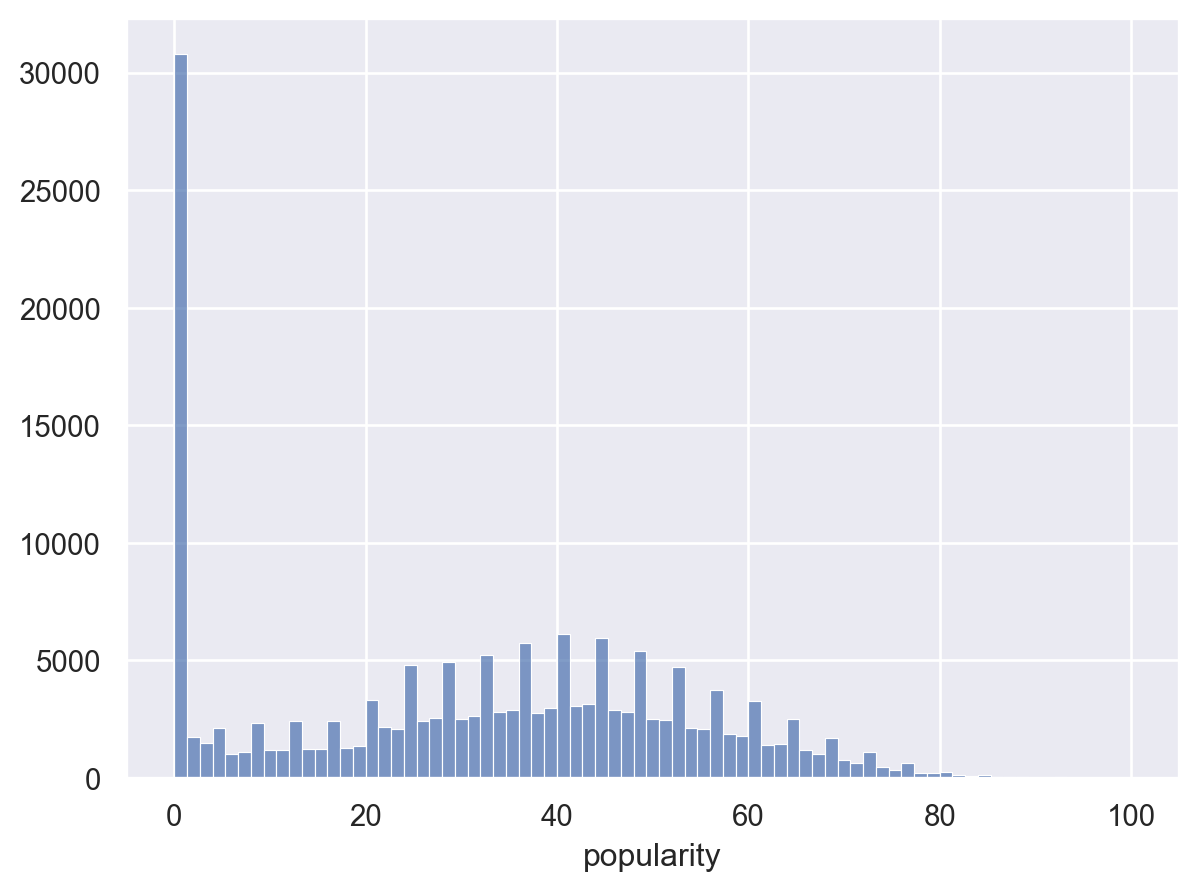

In [6]:
p = so.Plot(df, "popularity")
p.add(so.Bars(), so.Hist())

In [7]:
# dropping any song where "popularity" = 0 as it's likely 0 is just a placeholder for missing values
df.drop(df[df["popularity"] == 0].index, inplace=True)

In [8]:
# sanity check - this should equal 0
df.loc[df["popularity"] ==0]

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, explicit, id, instrumentalness, key, liveness, loudness, mode, name, popularity, release_date, speechiness, tempo]
Index: []

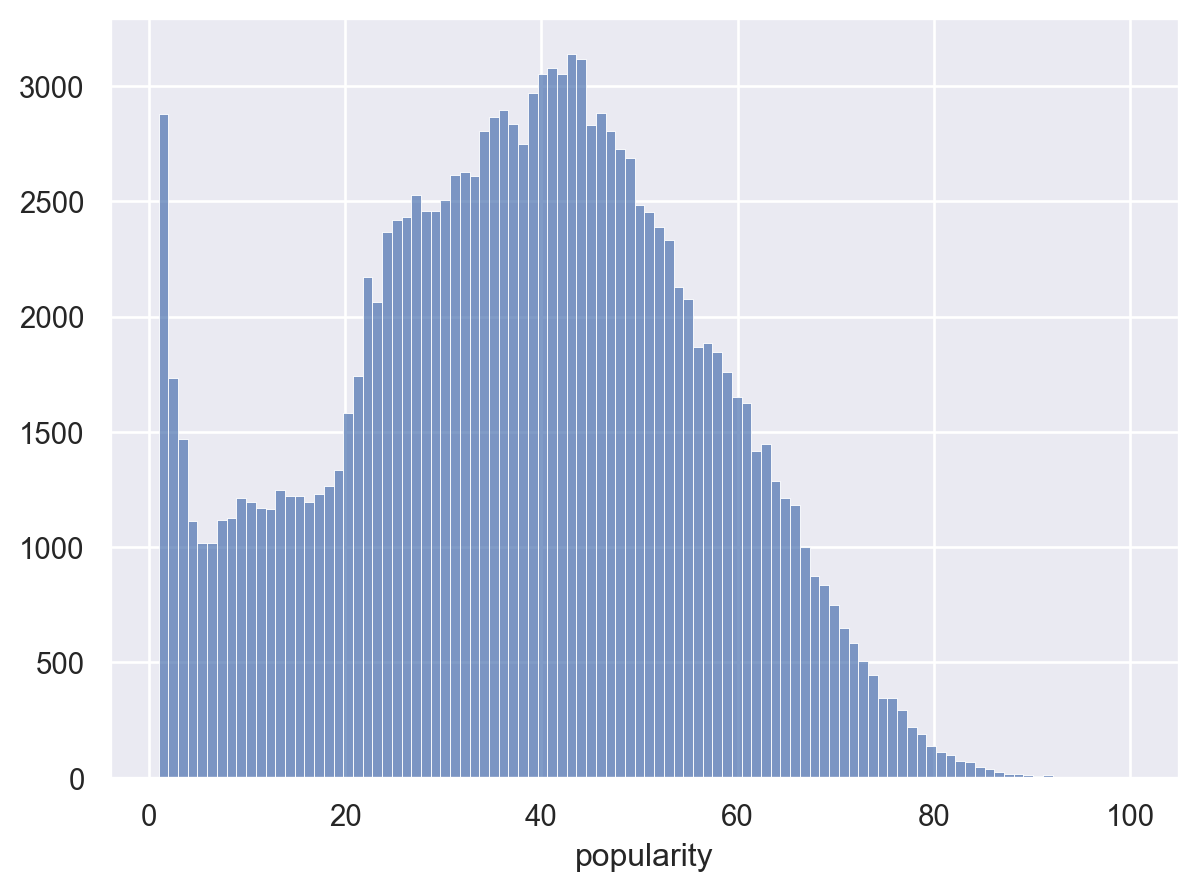

In [9]:
p = so.Plot(df, "popularity")
p.add(so.Bars(), so.Hist())

In [10]:
print(df['popularity'].mean())
print(df['popularity'].median())
print(df['popularity'].min())
print(df['popularity'].max())

37.572796492039146
38.0
1
100


In [11]:
df.loc[df["popularity"] == 100]

valence  year  acousticness                       artists  \
19611    0.145  2020         0.401  ['Bad Bunny', 'Jhay Cortez']   

       danceability  duration_ms  energy  explicit                      id  \
19611         0.731       205090   0.573         1  47EiUVwUp4C9fGccaPuUCS   

       instrumentalness  key  liveness  loudness  mode    name  popularity  \
19611          0.000052    4     0.113   -10.059     0  Dakiti         100   

      release_date  speechiness    tempo  
19611   2020-10-30       0.0544  109.928

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142761 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           142761 non-null  float64
 1   year              142761 non-null  int64  
 2   acousticness      142761 non-null  float64
 3   artists           142761 non-null  object 
 4   danceability      142761 non-null  float64
 5   duration_ms       142761 non-null  int64  
 6   energy            142761 non-null  float64
 7   explicit          142761 non-null  int64  
 8   id                142761 non-null  object 
 9   instrumentalness  142761 non-null  float64
 10  key               142761 non-null  int64  
 11  liveness          142761 non-null  float64
 12  loudness          142761 non-null  float64
 13  mode              142761 non-null  int64  
 14  name              142761 non-null  object 
 15  popularity        142761 non-null  int64  
 16  release_date      142761 

In [13]:
df['target'] = np.where(df['popularity'] < 38, 0, 1)
df.tail()

valence  year  acousticness  \
170648    0.608  2020       0.08460   
170649    0.734  2020       0.20600   
170650    0.637  2020       0.10100   
170651    0.195  2020       0.00998   
170652    0.642  2020       0.13200   

                                                  artists  danceability  \
170648  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...         0.786   
170649                                       ['Ashnikko']         0.717   
170650                                        ['MAMAMOO']         0.634   
170651                                         ['Eminem']         0.671   
170652                              ['KEVVO', 'J Balvin']         0.856   

        duration_ms  energy  explicit                      id  \
170648       301714   0.808         0  0KkIkfsLEJbrcIhYsCL7L5   
170649       150654   0.753         0  0OStKKAuXlxA0fMH54Qs6E   
170650       211280   0.858         0  4BZXVFYCb76Q0Klojq4piV   
170651       337147   0.623         1  5SiZJoLXp3WOl3J4C8IK0d   
170652       189507   0.721         1  7HmnJHfs0BkFzX4x8j0hkl   

        instrumentalness  key  liveness  loudness  mode  \
170648          0.000289    7    0.0822    -3.702     1   
170649          0.000000    7    0.1010    -6.020     1   
170650          0.000009    4    0.2580    -2.226     0   
170651          0.000008    2    0.6430    -7.161     1   
170652          0.004710    7    0.1820    -4.928     1   

                                   name  popularity release_date  speechiness  \
170648                            China          72   2020-05-29       0.0881   
170649      Halloweenie III: Seven Days          68   2020-10-23       0.0605   
170650                              AYA          76   2020-11-03       0.0809   
170651                         Darkness          70   2020-01-17       0.3080   
170652  Billetes Azules (with J Balvin)          74   2020-10-16       0.1080   

          tempo  target  
170648  105.029       1  
170649  137.936       1  
170650   91.688       1  
170651   75.055       1  
170652   94.991       1

In [14]:
df['target'].value_counts(normalize=True)

target
1    0.517347
0    0.482653
Name: proportion, dtype: float64

In [15]:
# remove brackets from "artists"

for index, row in df.iterrows():
    # Remove brackets from the string
    cleaned_string = row['artists'].strip("[]").strip("''")
    # Update the dataframe with the cleaned string
    df.at[index, 'artists'] = cleaned_string

df.head(2)

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   

                                             artists  danceability  \
0  Sergei Rachmaninoff', 'James Levine', 'Berline...         0.279   
1                                         Dennis Day         0.819   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   

   speechiness   tempo  target  
0       0.0366  80.954       0  
1       0.4150  60.936       0

In [16]:
keys_dict = {0:'C', 1:'C#/Db', 2:'D', 3:'D#/Eb', 4:'E', 5:'F', 6:'F#/Gb', 7:'G', 8:'G#/Ab', 9:'A', 10:'A#/Bb', 11:'B'}
df['key'] = df['key'].map(keys_dict)
df.head(2)

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   

                                             artists  danceability  \
0  Sergei Rachmaninoff', 'James Levine', 'Berline...         0.279   
1                                         Dennis Day         0.819   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8             0.000   

     key  liveness  loudness  mode  \
0  A#/Bb     0.665   -20.096     1   
1      G     0.160   -12.441     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   

   speechiness   tempo  target  
0       0.0366  80.954       0  
1       0.4150  60.936       0

# Splitting by year

After exploring the data, it was found that there was a significant change in audio features around the time of the late 1960's. Specifically, acousticness became significantly less prevalent, while energy became much more prevalent. Therefore, modeling was performed on data from 1968-2020.

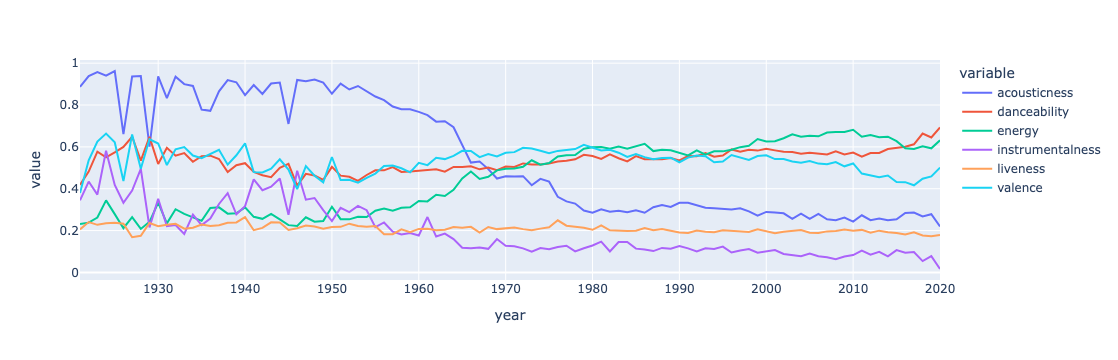

In [17]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(df_year, x='year', y=sound_features)
fig.show()

In [18]:
df_pre = df.loc[df['year'] < 1968]
df_pre.head(1)

valence  year  acousticness  \
0   0.0594  1921         0.982   

                                             artists  danceability  \
0  Sergei Rachmaninoff', 'James Levine', 'Berline...         0.279   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz             0.878   

     key  liveness  loudness  mode  \
0  A#/Bb     0.665   -20.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   

   speechiness   tempo  target  
0       0.0366  80.954       0

In [19]:
df_post = df.loc[df['year'] > 1968]
df_post.head(1)

valence  year  acousticness                       artists  danceability  \
9406    0.663  1969         0.201  Creedence Clearwater Revival          0.64   

      duration_ms  energy  explicit                      id  instrumentalness  \
9406       140773   0.663         0  4BP3uh0hFLFRb5cjsgLqDh           0.00806   

     key  liveness  loudness  mode           name  popularity release_date  \
9406   C     0.152    -7.516     1  Fortunate Son          81   1969-11-02   

      speechiness   tempo  target  
9406       0.0374  132.77       1

# Exploratory Data Analysis
## Popularity by year

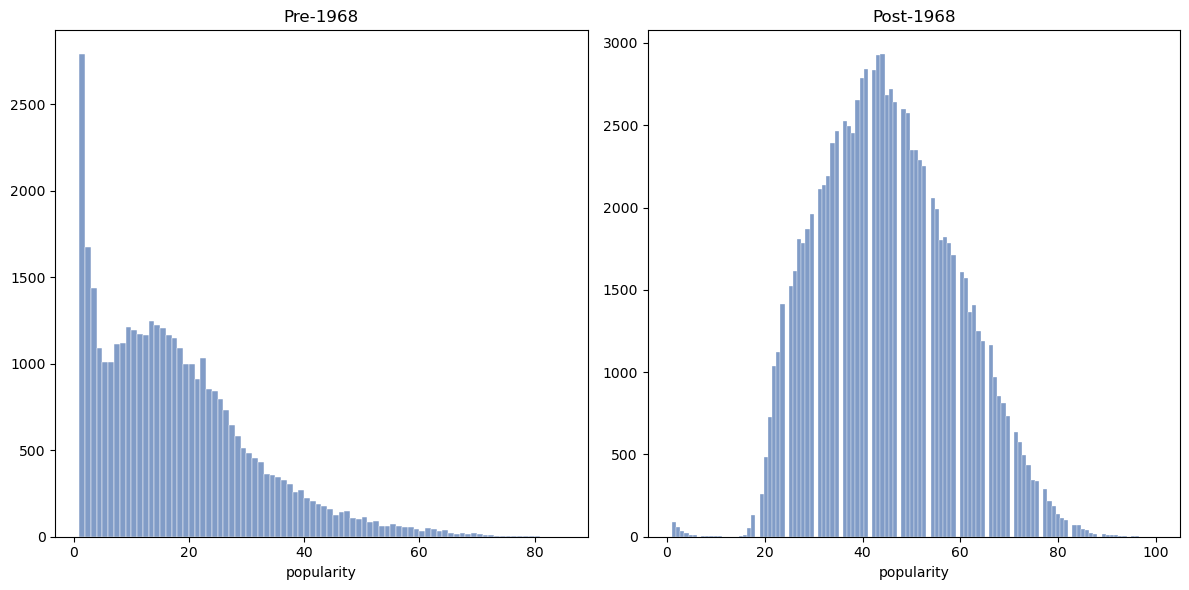

In [20]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "popularity")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "popularity")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

In [21]:
df_post['target'].value_counts(normalize=True)

target
1    0.68447
0    0.31553
Name: proportion, dtype: float64

## Acousticness

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

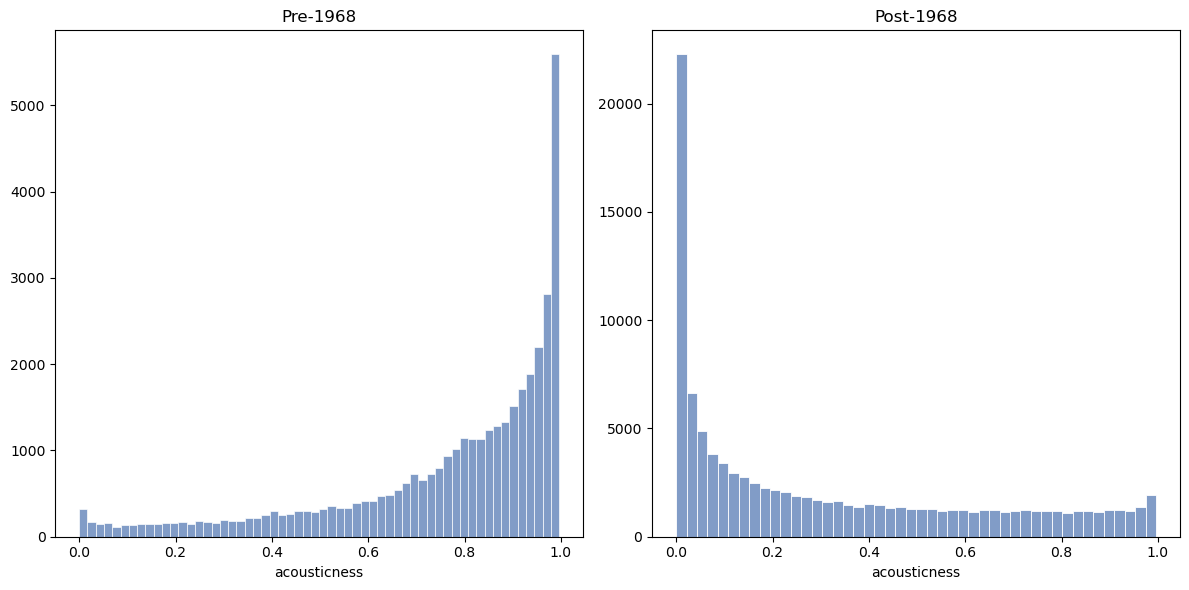

In [22]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "acousticness")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "acousticness")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

## Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

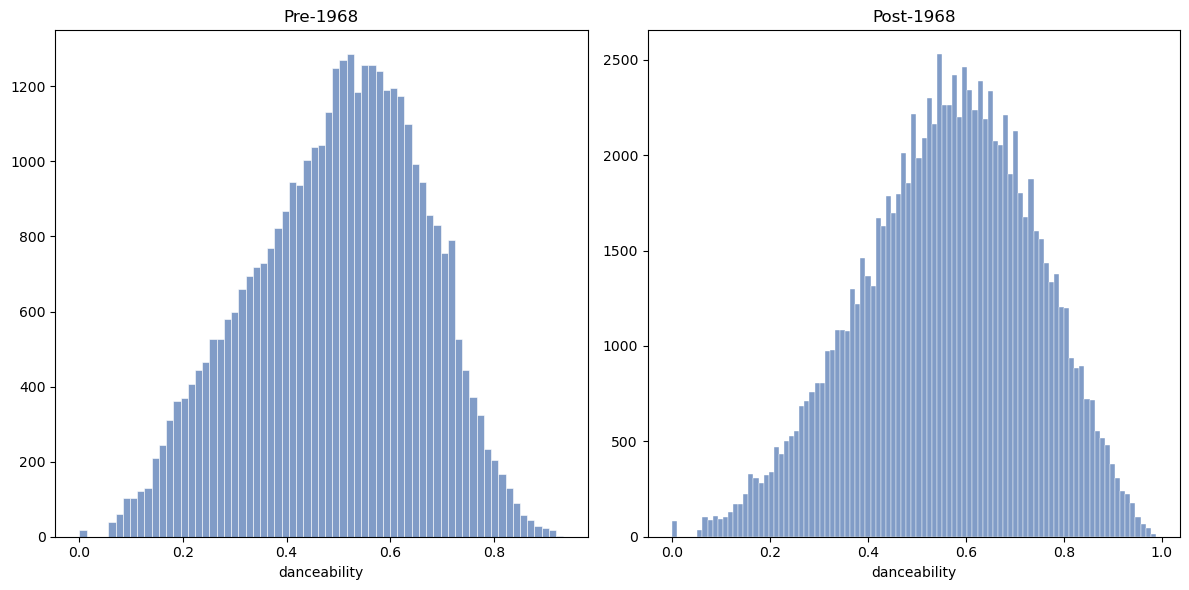

In [23]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "danceability")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "danceability")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

## Song Duration

In [24]:
print(f' Average song length pre-1968: {(df_pre["duration_ms"].mean() / 60000)} minutes')
print(f' Max song length pre-1968: {(df_pre["duration_ms"].max() / 60000)} minutes')
print(f' Min song length pre-1968: {(df_pre["duration_ms"].min() / 60000)} minutes')

print('__________________')

print(f' Average song length post-1968: {(df_post["duration_ms"].mean() / 60000)} minutes')
print(f' Max song length post-1968: {(df_post["duration_ms"].max() / 60000)} minutes')
print(f' Min song length post-1968: {(df_post["duration_ms"].min() / 60000)} minutes')

 Average song length pre-1968: 3.5290658790384484 minutes
 Max song length pre-1968: 59.18586666666667 minutes
 Min song length pre-1968: 0.41045 minutes
__________________
 Average song length post-1968: 4.0485927374973585 minutes
 Max song length post-1968: 90.05833333333334 minutes
 Min song length post-1968: 0.24513333333333334 minutes


## Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

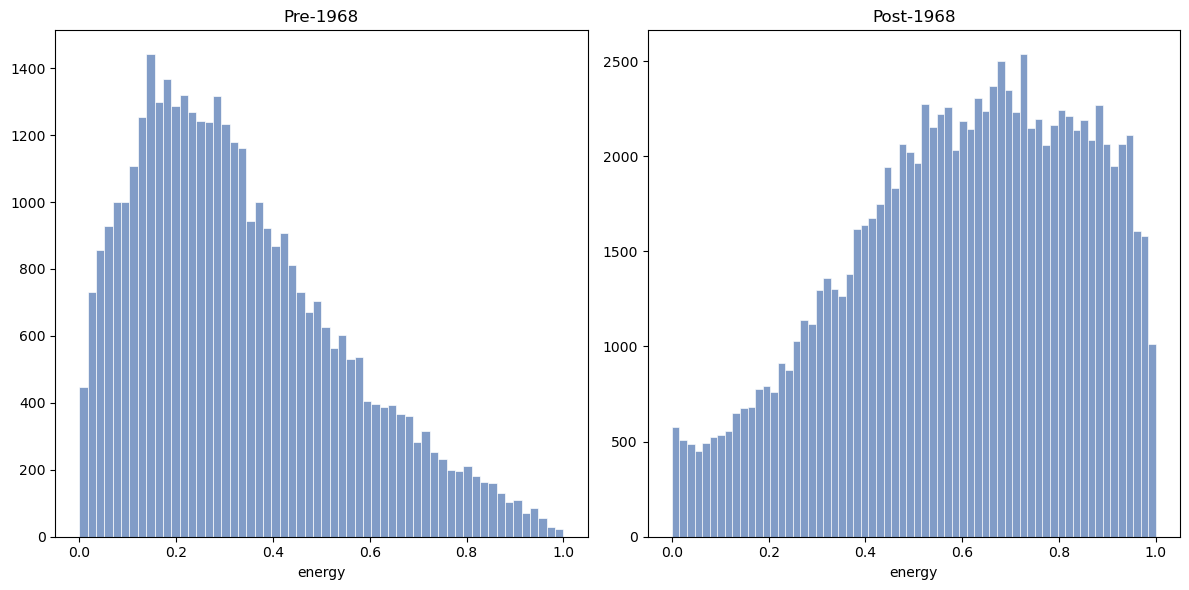

In [25]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "energy")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "energy")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

In [26]:
print(df_pre["energy"].mean())
print(df_post["energy"].mean())

0.33093568447770566
0.5966414723028914


## Explicit

A marker of whether or not a song is explicit, presumably 0 meaning the song is not explicit, and 1 meaning a song is explicit. 

In [27]:
explicit_pre = df_pre["explicit"].value_counts(normalize=True)
explicit_pre

explicit
0    0.997305
1    0.002695
Name: proportion, dtype: float64

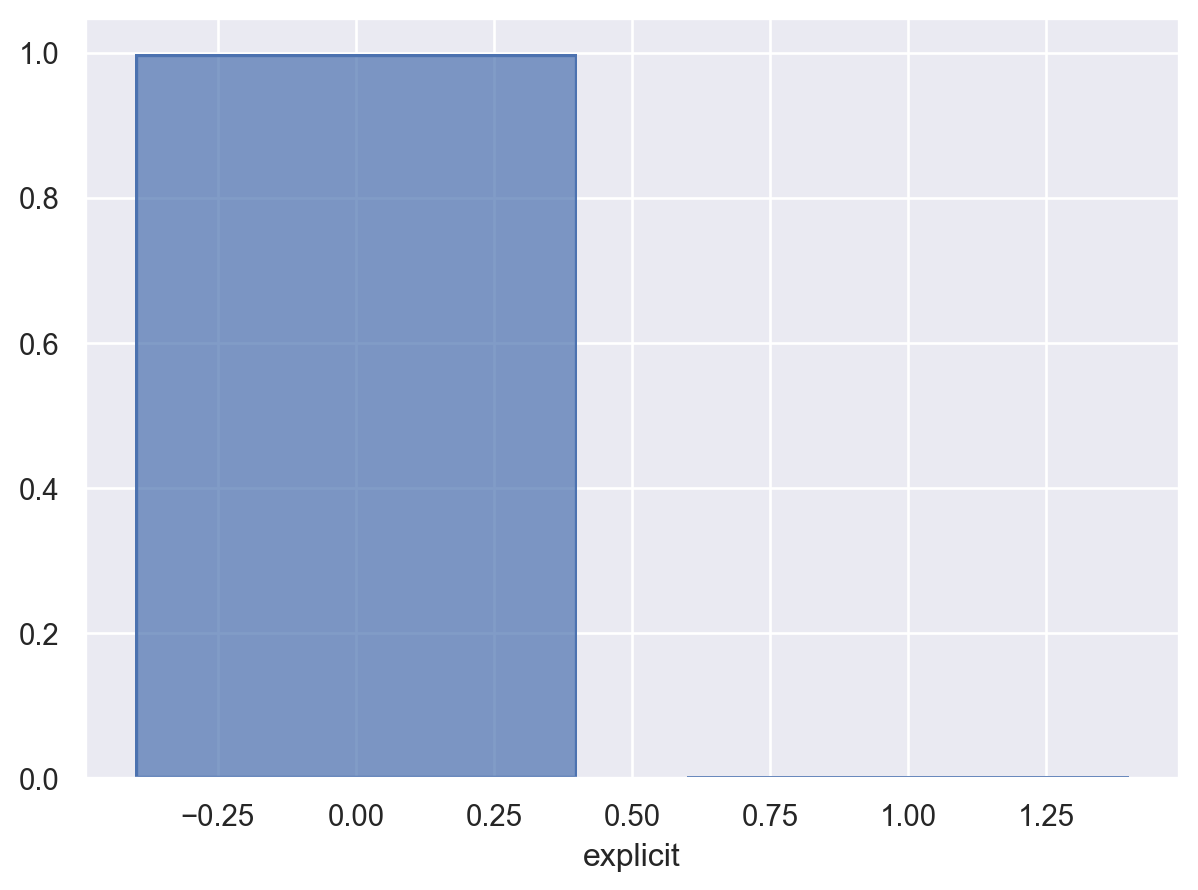

In [28]:
so.Plot(x=explicit_pre.index, y=explicit_pre.values).add(so.Bar())

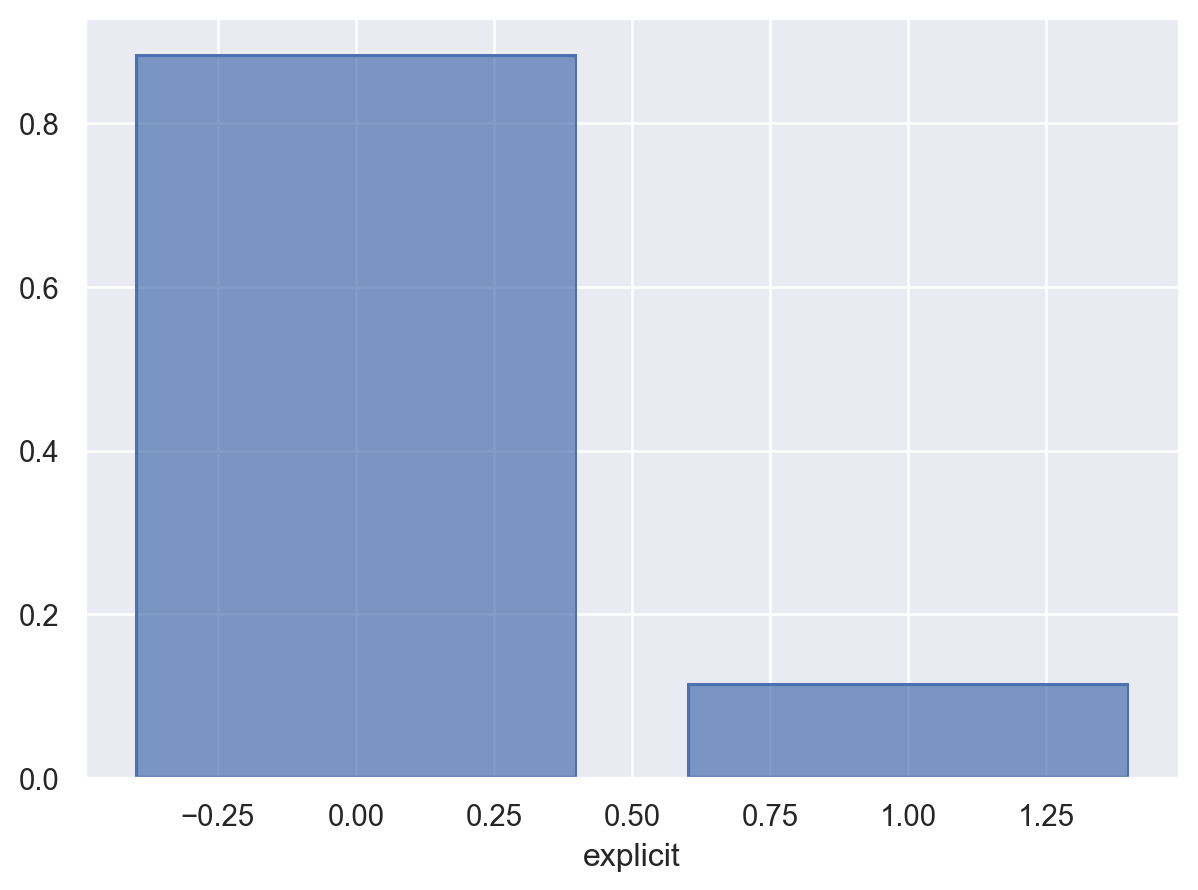

In [29]:
explicit_post = df_post["explicit"].value_counts(normalize=True)
so.Plot(x=explicit_post.index, y=explicit_post.values).add(so.Bar())

## Instrumentalness

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

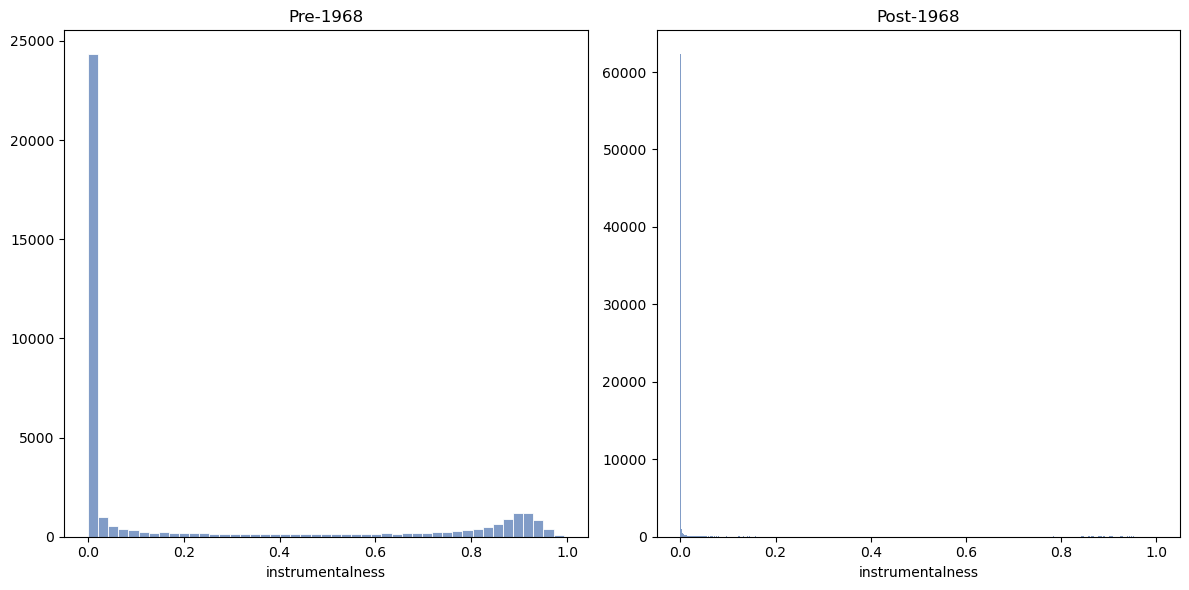

In [30]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "instrumentalness")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "instrumentalness")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

## Key

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [31]:
key_pre = (df_pre["key"].value_counts(normalize=True)) * 100
key_pre

key
C        14.211325
F        13.274545
G        12.405799
D         9.312853
A#/Bb     9.223885
A         8.399623
G#/Ab     8.012351
D#/Eb     6.238225
C#/Db     6.089073
E         5.840486
B         3.584886
F#/Gb     3.406950
Name: proportion, dtype: float64

In [32]:
key_post = (df_post["key"].value_counts(normalize=True)) * 100
key_post

key
G        12.291189
C        12.277537
D        11.840655
A        11.479838
E         8.345604
F         8.239310
C#/Db     8.004291
B         7.131503
A#/Bb     6.159247
F#/Gb     5.605344
G#/Ab     5.600468
D#/Eb     3.025013
Name: proportion, dtype: float64

## Liveness

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

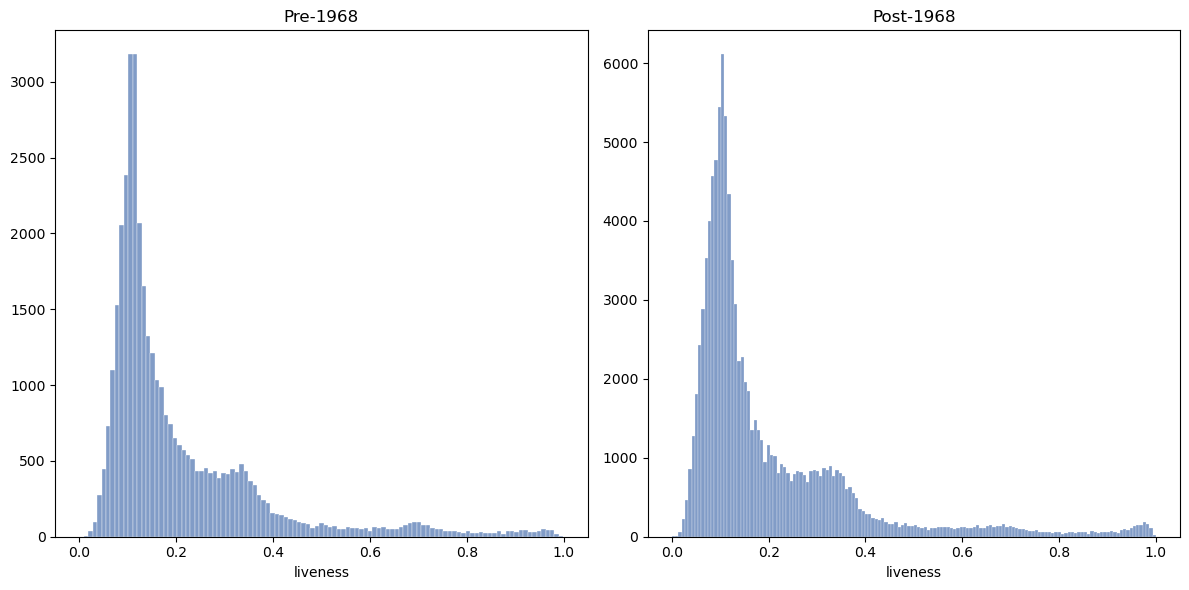

In [33]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "liveness")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "liveness")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

## Loudness

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

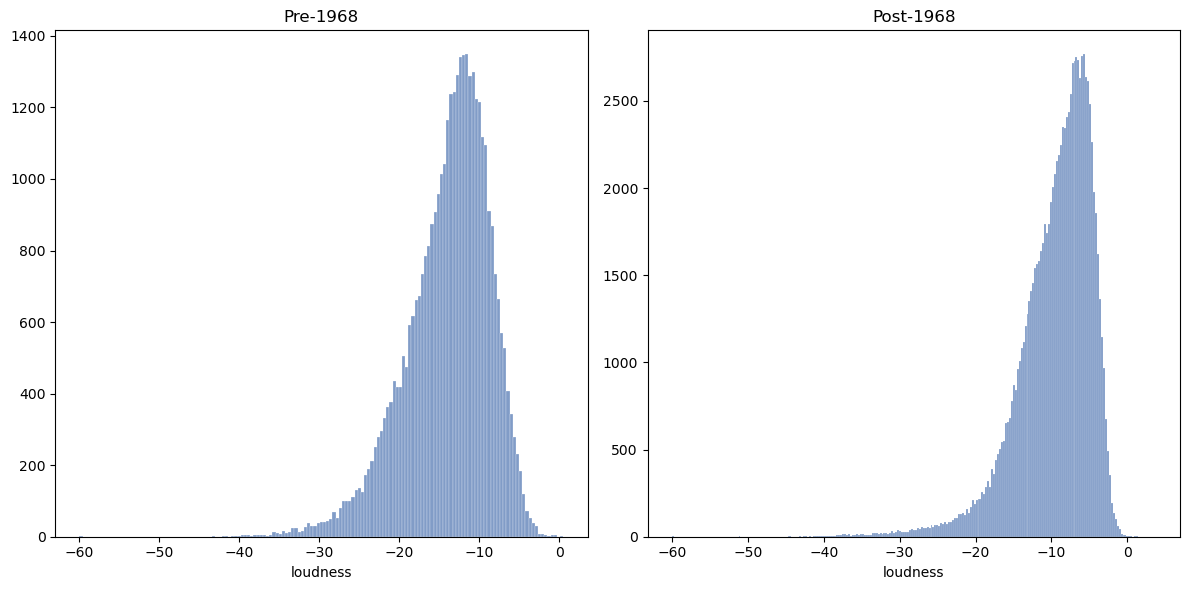

In [34]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "loudness")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "loudness")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

## Mode

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [35]:
mode_pre = df_pre["mode"].value_counts(normalize=True)
mode_pre

mode
1    0.725795
0    0.274205
Name: proportion, dtype: float64

In [36]:
mode_post = df_post["mode"].value_counts(normalize=True)
mode_post

mode
1    0.701468
0    0.298532
Name: proportion, dtype: float64

## Speechiness

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

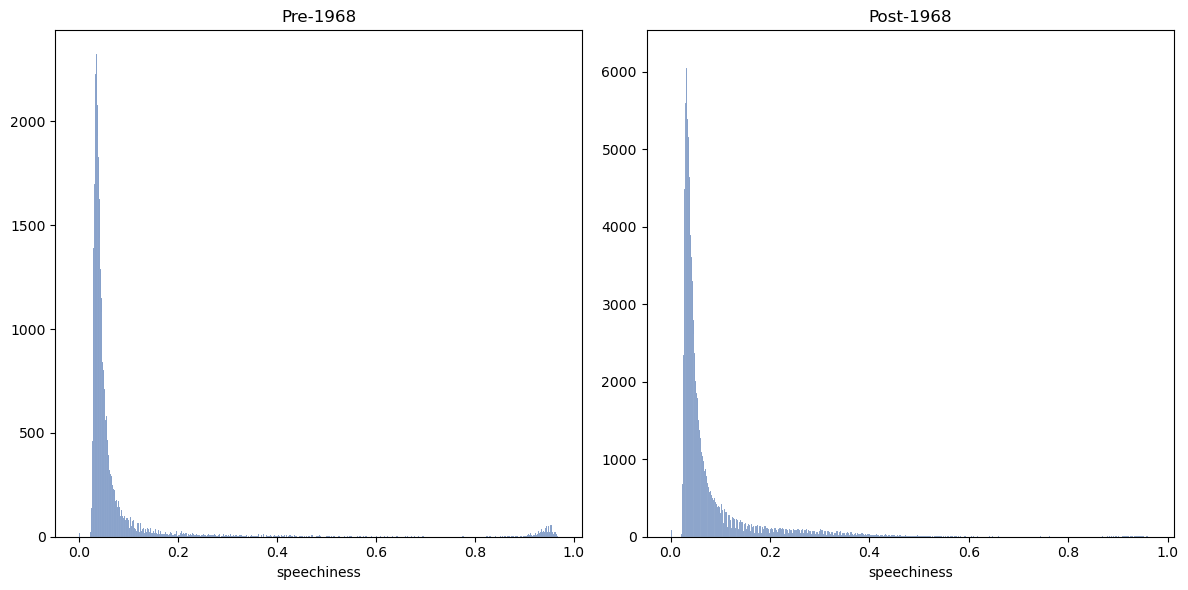

In [37]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "speechiness")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "speechiness")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

## Tempo

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

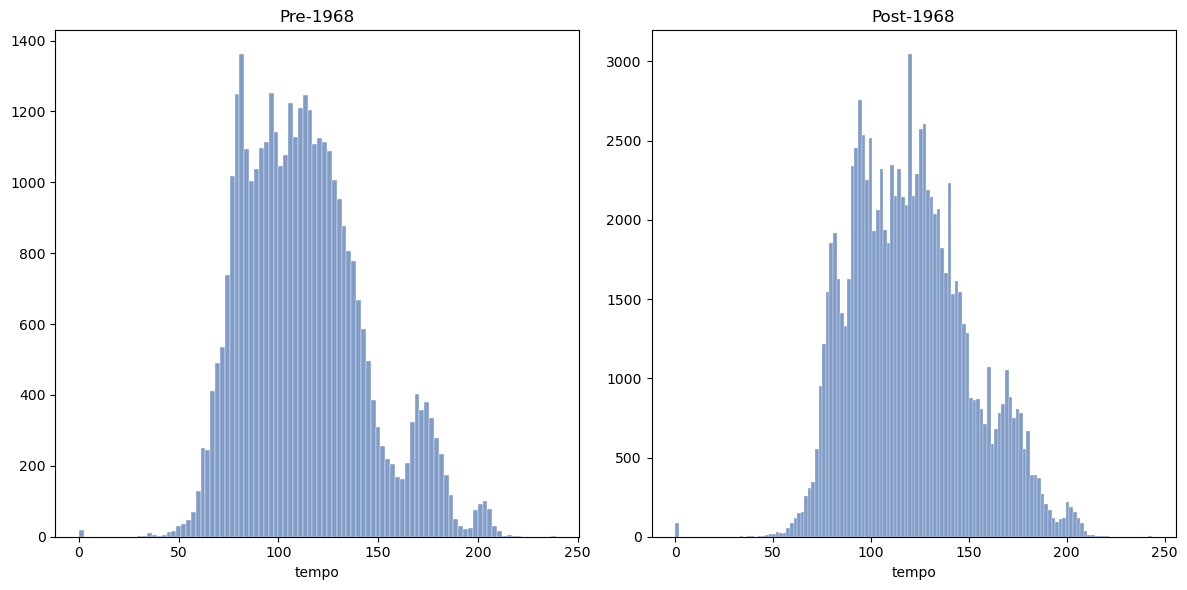

In [38]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "tempo")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "tempo")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

# Valence

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

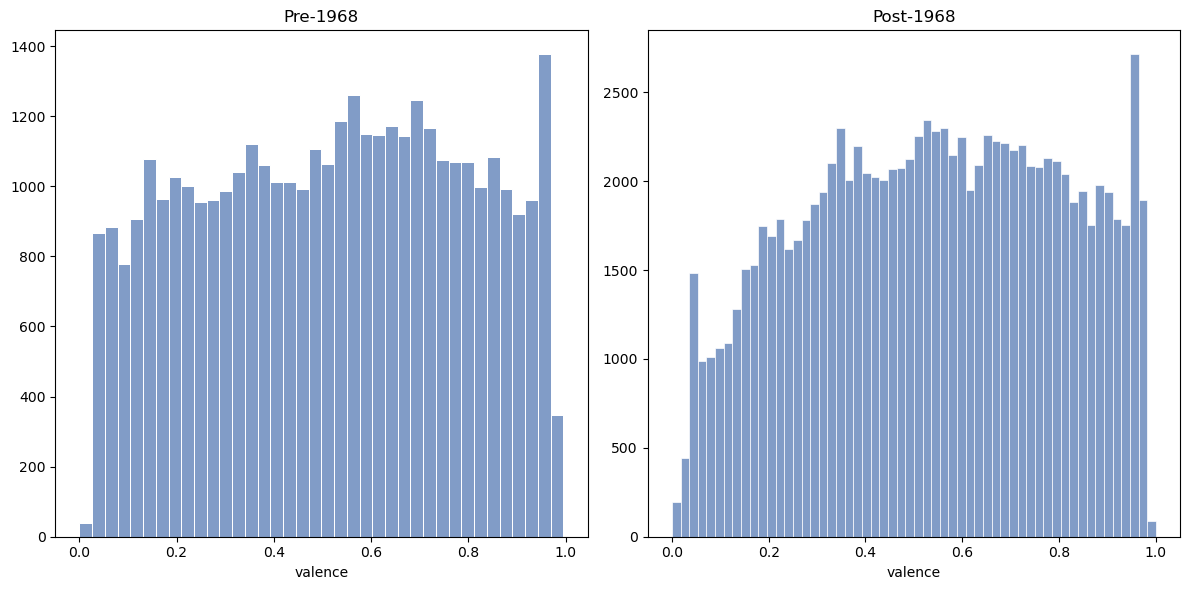

In [39]:
# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot
p1 = so.Plot(df_pre, "valence")
p1.add(so.Bars(), so.Hist()).on(axes[0]).plot()
axes[0].set_title("Pre-1968")

# Second plot
p2 = so.Plot(df_post, "valence")
p2.add(so.Bars(), so.Hist()).on(axes[1]).plot()
axes[1].set_title("Post-1968")

# Display the plots
plt.tight_layout()
plt.show()

In [40]:
print(df_pre["valence"].mean())
print(df_post["valence"].mean())

0.5171625303537786
0.5369023542737335


In [41]:
post_pop = df_post[df_post['target'] == 1]
post_pop.head(3)

valence  year  acousticness                       artists  danceability  \
9406    0.663  1969        0.2010  Creedence Clearwater Revival         0.640   
9407    0.394  1969        0.0339                   The Beatles         0.557   
9408    0.578  1969        0.6110                  Neil Diamond         0.529   

      duration_ms  energy  explicit                      id  instrumentalness  \
9406       140773   0.663         0  4BP3uh0hFLFRb5cjsgLqDh          0.008060   
9407       185733   0.540         0  6dGnYIeXmHdcikdzNNDMm2          0.002480   
9408       203573   0.127         0  62AuGbAkt8Ox2IrFFb8GKV          0.000109   

     key  liveness  loudness  mode                                  name  \
9406   C     0.152    -7.516     1                         Fortunate Son   
9407   A     0.179   -10.484     1  Here Comes The Sun - Remastered 2009   
9408   B     0.237   -16.066     1                        Sweet Caroline   

      popularity release_date  speechiness    tempo  target  
9406          81   1969-11-02       0.0374  132.770       1  
9407          82   1969-09-26       0.0347  129.171       1  
9408          78   1969-06-06       0.0274   63.050       1

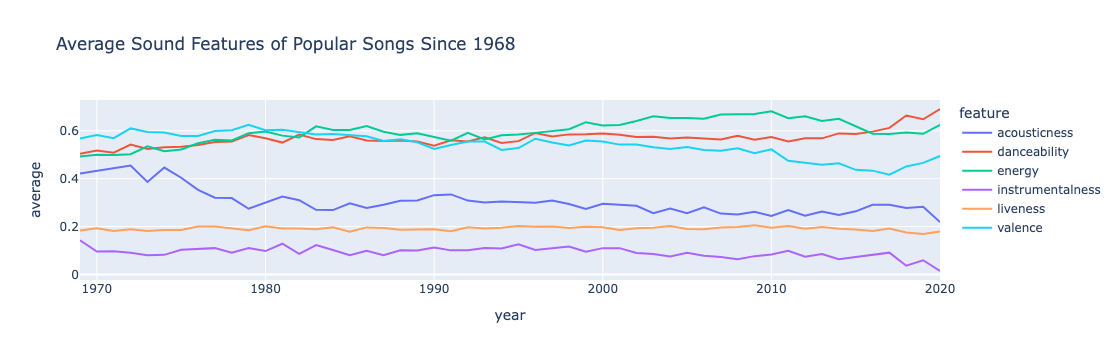

In [42]:
# Group by year and calculate the mean of each sound feature
post_pop_avg = post_pop.groupby('year')[sound_features].mean().reset_index()

# Melt the DataFrame to have a long format suitable for line plot
post_pop_melted = post_pop_avg.melt(id_vars='year', value_vars=sound_features, 
                                    var_name='feature', value_name='average')

# Plot the average of each sound feature over time
fig = px.line(post_pop_melted, x='year', y='average', color='feature', 
              title='Average Sound Features of Popular Songs Since 1968')
fig.show()

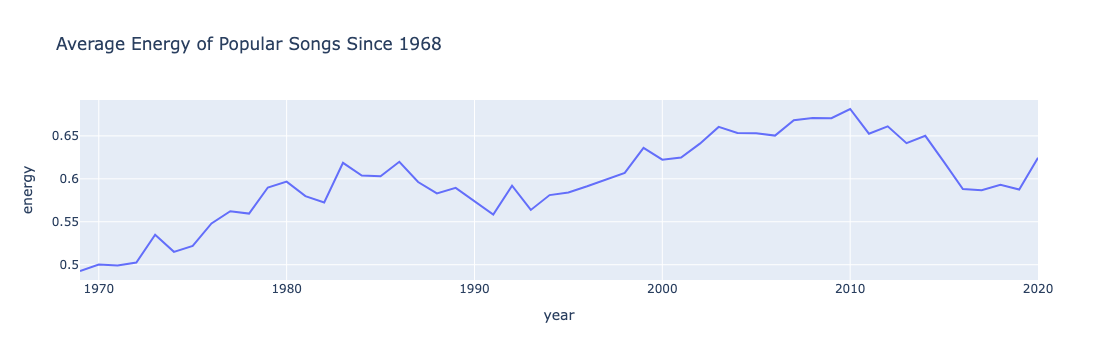

In [43]:
# Group by year and calculate the mean of the 'energy' feature
post_pop_avg_energy = post_pop.groupby('year')['energy'].mean().reset_index()

# Plot the average 'energy' over time
fig = px.line(post_pop_avg_energy, x='year', y='energy', 
              title='Average Energy of Popular Songs Since 1968')
fig.show()

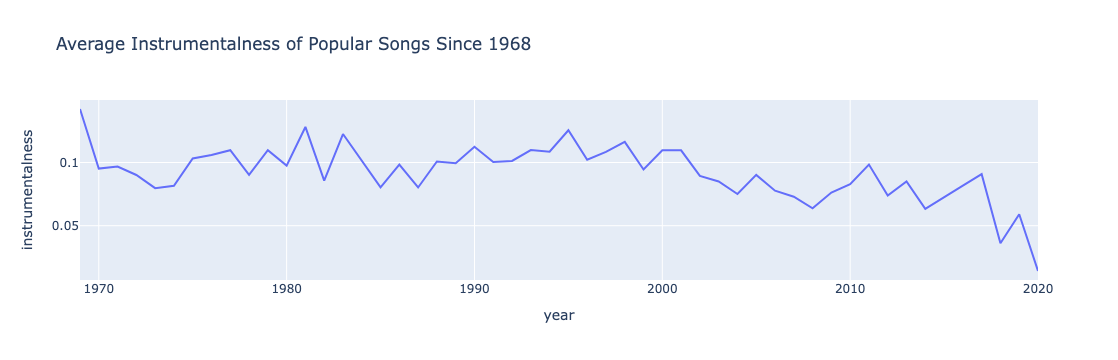

In [44]:
# Group by year and calculate the mean of the 'instrumentalness' feature
post_pop_avg_energy = post_pop.groupby('year')['instrumentalness'].mean().reset_index()

# Plot the average 'energy' over time
fig = px.line(post_pop_avg_energy, x='year', y='instrumentalness', 
              title='Average Instrumentalness of Popular Songs Since 1968')
fig.show()

In [45]:
post_pop['energy'].mean()

0.6125637217555456

In [46]:
post_pop['instrumentalness'].mean()

0.0881387469966804

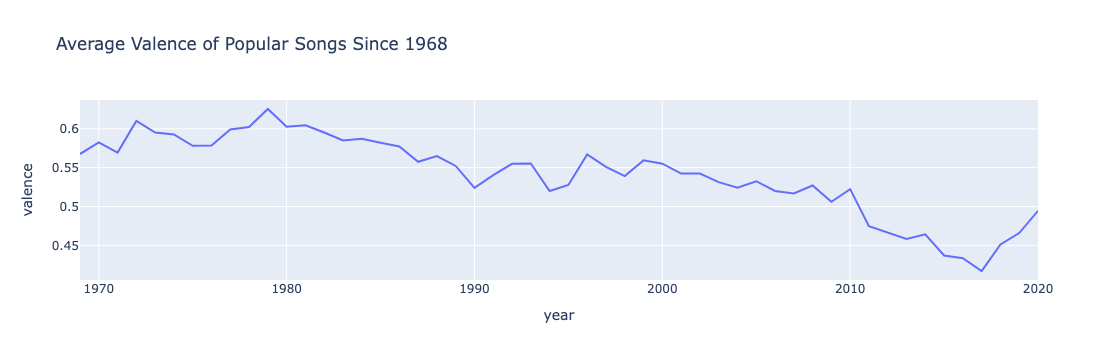

In [47]:
# Group by year and calculate the mean of the 'energy' feature
post_pop_avg_energy = post_pop.groupby('year')['valence'].mean().reset_index()

# Plot the average 'energy' over time
fig = px.line(post_pop_avg_energy, x='year', y='valence', 
              title='Average Valence of Popular Songs Since 1968')
fig.show()

In [48]:
post_pop['valence'].mean()

0.5250970312869538

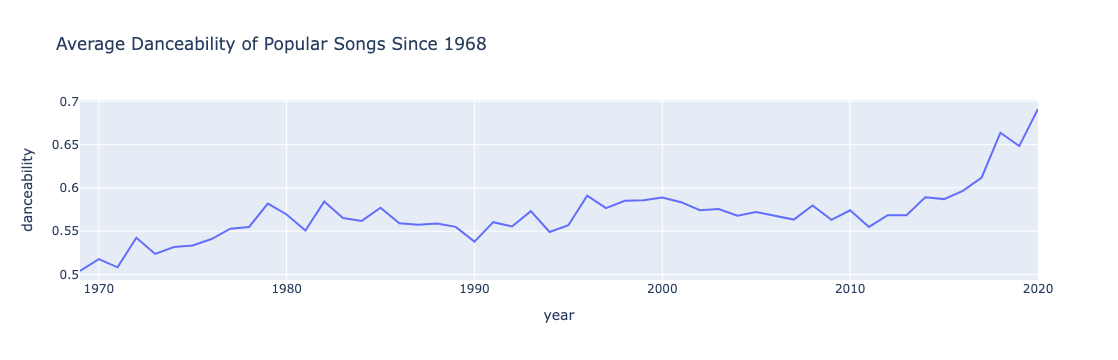

In [49]:
# Group by year and calculate the mean of the 'energy' feature
post_pop_avg_energy = post_pop.groupby('year')['danceability'].mean().reset_index()

# Plot the average 'energy' over time
fig = px.line(post_pop_avg_energy, x='year', y='danceability', 
              title='Average Danceability of Popular Songs Since 1968')
fig.show()

In [50]:
post_pop['danceability'].mean()

0.5766944677940987

In [51]:
explicit_pop = post_pop["explicit"].value_counts(normalize=True)
explicit_pop

explicit
0    0.845987
1    0.154013
Name: proportion, dtype: float64

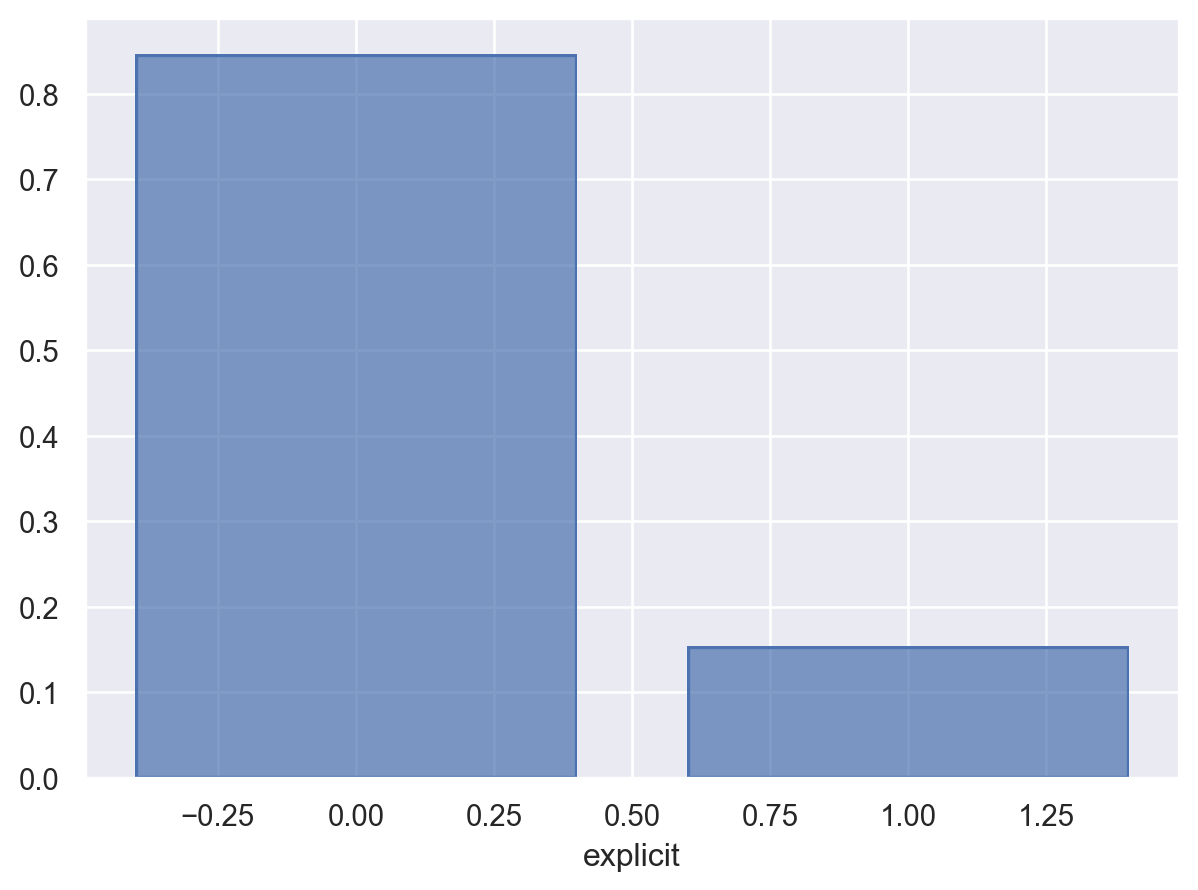

In [52]:
so.Plot(x=explicit_pop.index, y=explicit_pop.values).add(so.Bar())

# Model Preprocessing
Using domain knowledge and further analysis, the features kept for the model were:
- valence
- acousticness
- danceability
- duration_ms
- energy
- explicit
- instrumentalness
- key
- liveness
- mode
- speechiness
- tempo  

One Hot Encoding was used for categorical variables, and Standard Scaling was used for numeric variables. There were not missing values, and therefore imputing was not necessary.

In [53]:
# train test split
from sklearn.model_selection import train_test_split, GridSearchCV

to_drop = ['popularity', 'id', 'artists', 'name', 'release_date', 'year', 'target', 'loudness']

X = df_post.drop(labels= to_drop, axis=1)
y = df_post['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76908 entries, 52913 to 14545
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           76908 non-null  float64
 1   acousticness      76908 non-null  float64
 2   danceability      76908 non-null  float64
 3   duration_ms       76908 non-null  int64  
 4   energy            76908 non-null  float64
 5   explicit          76908 non-null  int64  
 6   instrumentalness  76908 non-null  float64
 7   key               76908 non-null  object 
 8   liveness          76908 non-null  float64
 9   mode              76908 non-null  int64  
 10  speechiness       76908 non-null  float64
 11  tempo             76908 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 7.6+ MB


In [54]:
X_train['key'].unique()

array(['C', 'E', 'G', 'D#/Eb', 'A#/Bb', 'A', 'F', 'C#/Db', 'F#/Gb', 'B',
       'D', 'G#/Ab'], dtype=object)

In [55]:
y_train[:5]

52913     1
162754    0
70271     1
82182     0
33900     1
Name: target, dtype: int64

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25637 entries, 169306 to 150116
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           25637 non-null  float64
 1   acousticness      25637 non-null  float64
 2   danceability      25637 non-null  float64
 3   duration_ms       25637 non-null  int64  
 4   energy            25637 non-null  float64
 5   explicit          25637 non-null  int64  
 6   instrumentalness  25637 non-null  float64
 7   key               25637 non-null  object 
 8   liveness          25637 non-null  float64
 9   mode              25637 non-null  int64  
 10  speechiness       25637 non-null  float64
 11  tempo             25637 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 2.5+ MB


In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report



numeric_features = ['valence', 'acousticness','energy', 'danceability', 'duration_ms', 'explicit', 'instrumentalness', 
              'liveness', 'mode', 'speechiness', 'tempo']
numeric_transformer = StandardScaler()

categorical_features = ['key']
categorical_transformer = OneHotEncoder()


CT = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Modeling: Classification
Classifying song popularity. 

## Dummy Classifier

In [58]:
from sklearn.dummy import DummyClassifier
# Instantiate the model
dummy_model = DummyClassifier(strategy="most_frequent")

# fitting the model to our newly encoded dataset
dummy_model.fit(X_train, y_train)

# predicting the first 10
dummy_model.predict(X_test)[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
# checking the ratio of 1 to 0 in our training set
print(y_train.value_counts(normalize=True))

target
1    0.685039
0    0.314961
Name: proportion, dtype: float64


## Logistic Regression

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define the pipeline
pipe_lr = Pipeline(steps=[
    ('preprocessor', CT),
    ('classifier', LogisticRegression(random_state=27, class_weight='balanced'))
])

# Fit the pipeline on the training data
pipe_lr.fit(X_train, y_train)

# Make predictions on the test data
y_predict_lr = pipe_lr.predict(X_test)
y_predict_lr

array([1, 0, 1, ..., 0, 0, 0])

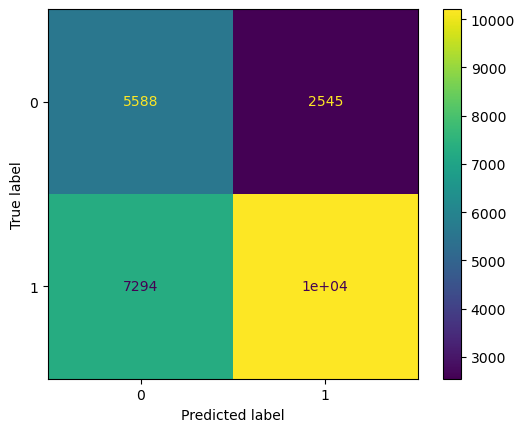

In [61]:
# plotting a confusion matrix to assess our model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [62]:
print(f"""
Our model's accuracy is {round(accuracy_score(y_test, y_predict_lr), 2)}.
Our model's recall is {round(recall_score(y_test, y_predict_lr), 2)}.
Our model's precision is {round(precision_score(y_test, y_predict_lr), 2)}.
Our model's f1-score is {round(f1_score(y_test, y_predict_lr), 2)}.
""")

# Print classification report
print(classification_report(y_test, y_predict_lr))


Our model's accuracy is 0.62.
Our model's recall is 0.58.
Our model's precision is 0.8.
Our model's f1-score is 0.67.

              precision    recall  f1-score   support

           0       0.43      0.69      0.53      8133
           1       0.80      0.58      0.67     17504

    accuracy                           0.62     25637
   macro avg       0.62      0.64      0.60     25637
weighted avg       0.68      0.62      0.63     25637



# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree


# Define the pipeline
pipe_dt = Pipeline(steps=[
    ('preprocessor', CT),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=27))
])

# Fit the pipeline to the training data
pipe_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = pipe_dt.predict(X_test)

In [64]:
# Evaluate the model
print(f"""
Our model's accuracy is {round(accuracy_score(y_test, y_pred_dt), 2)}.
Our model's recall is {round(recall_score(y_test, y_pred_dt), 2)}.
Our model's precision is {round(precision_score(y_test, y_pred_dt), 2)}.
Our model's f1-score is {round(f1_score(y_test, y_pred_dt), 2)}.
""")

# Print classification report
print(classification_report(y_test, y_pred_dt))


Our model's accuracy is 0.69.
Our model's recall is 0.98.
Our model's precision is 0.69.
Our model's f1-score is 0.81.

              precision    recall  f1-score   support

           0       0.58      0.05      0.09      8133
           1       0.69      0.98      0.81     17504

    accuracy                           0.69     25637
   macro avg       0.64      0.52      0.45     25637
weighted avg       0.66      0.69      0.58     25637



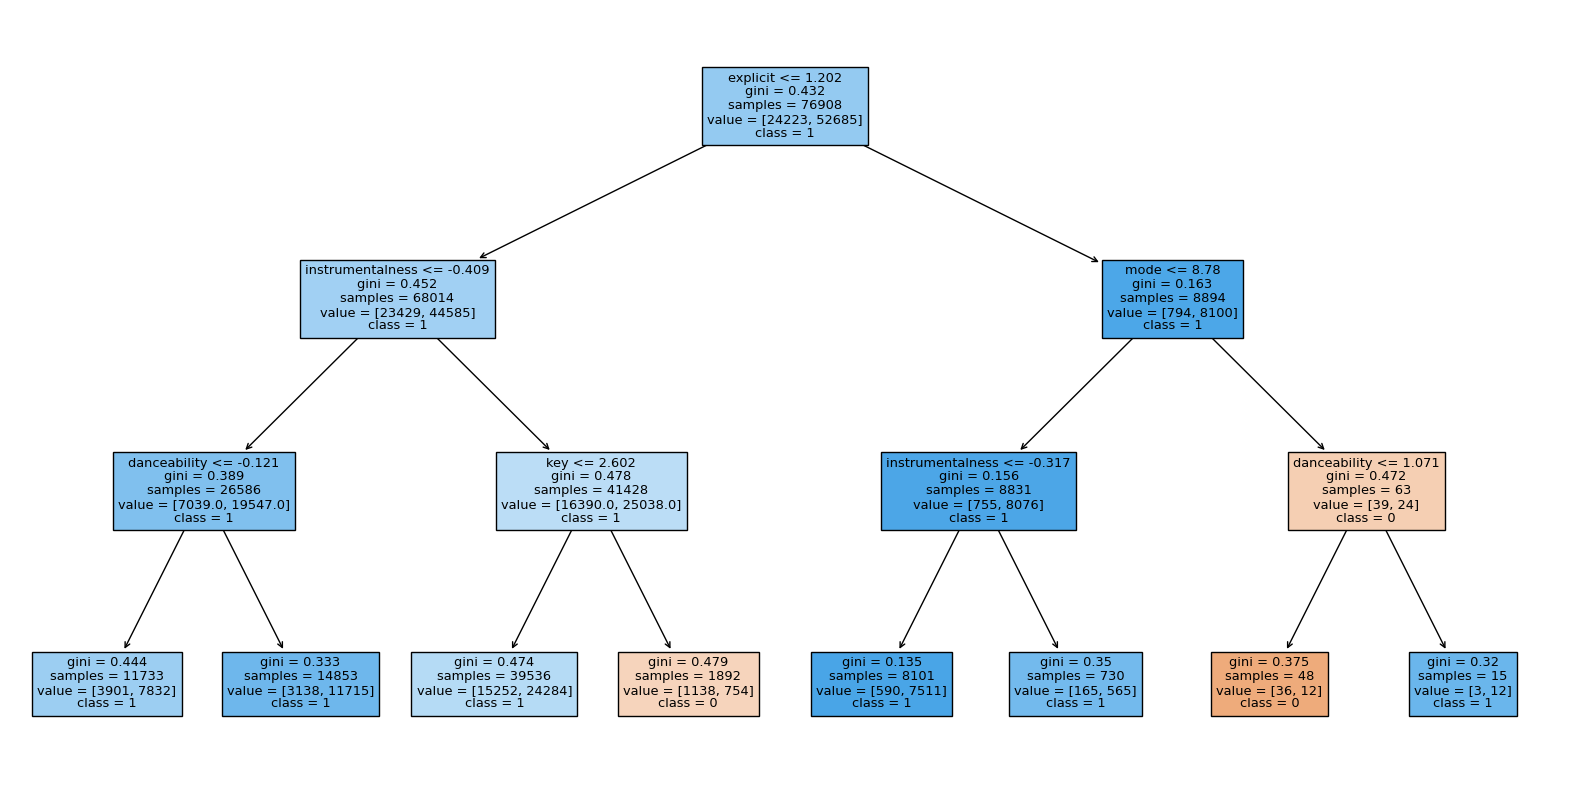

In [65]:
# Extract the trained decision tree classifier from the pipeline
dt_model = pipe_dt.named_steps['dt']

feature_names = X_train.columns

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=feature_names, class_names=dt_model.classes_.astype(str), filled=True)
plt.show()
#plt.savefig("decision_tree.png")

The decision tree model demonstrates that after 1968 the main factors determining song popularity is instrumentalness, danceability, key, mode, and whether or not a song is explicit are the key factors to determining whether or not a song will be popular. 

 # Ensemble method - XG Boost

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [67]:
# Define the pipeline
pipe_xgb = Pipeline(steps=[
    ('preprocessor', CT),
    ('classifier', XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'))
])

# Train the pipeline
pipe_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = pipe_xgb.predict(X_test)

In [68]:
print(f"""
Our model's accuracy is {round(accuracy_score(y_test, y_pred_xgb), 2)}.
Our model's recall is {round(recall_score(y_test, y_pred_xgb), 2)}.
Our model's precision is {round(precision_score(y_test, y_pred_xgb), 2)}.
Our model's f1-score is {round(f1_score(y_test, y_pred_xgb), 2)}.
""")

# Print classification report
print(classification_report(y_test, y_pred_xgb))


Our model's accuracy is 0.7.
Our model's recall is 0.88.
Our model's precision is 0.74.
Our model's f1-score is 0.8.

              precision    recall  f1-score   support

           0       0.55      0.32      0.41      8133
           1       0.74      0.88      0.80     17504

    accuracy                           0.70     25637
   macro avg       0.65      0.60      0.60     25637
weighted avg       0.68      0.70      0.68     25637



# Evaluation 

The evaluation metric that makes the most business sense is precision. If the model classifies a false positive (a song is listed as popular but it is not) there is a higher probability the listener will skip the song if they don't like it. If the model classifies a false negative (a song is not listed as popular but it is) it will likely not be recommended to the listener and will hence not be heard. For business purposes, it makes the most sense to maximize listening time.

# Modeling: Time Series Analysis

Focusing on two of the most important continuous numeric features since 1968, instrumentalness and danceability, time-series analysis was performed to predict future outcomes. Since there does not appear to be seasonality, Autoregressive Integrated Moving Average (ARIMA) was chosen as the best model. An ADF test was used to determine stationarity, and it was concluded that first-order differencing was needed for the best ARIMA results.

In [69]:
# only looking at post-1968

df_year_post = df_year.loc[df_year['year'] > 1968]
df_year_post.head(5)

mode  year  acousticness  danceability  duration_ms    energy  \
48     1  1969      0.448846      0.488098  242545.9405  0.487625   
49     1  1970      0.460057      0.506308  242852.1515  0.495633   
50     1  1971      0.458336      0.504274  260511.7935  0.496361   
51     1  1972      0.460043      0.520999  245914.2285  0.504526   
52     1  1973      0.416524      0.515449  257002.7905  0.536138   

    instrumentalness  liveness   loudness  speechiness       tempo   valence  \
48          0.159453  0.206966 -12.062166     0.054975  117.024329  0.554745   
49          0.127567  0.212269 -11.772558     0.051681  117.111610  0.572075   
50          0.125018  0.214915 -12.079936     0.059422  118.272247  0.574913   
51          0.114880  0.206955 -11.773563     0.054871  119.412852  0.595688   
52          0.099680  0.201375 -11.260197     0.057826  120.146316  0.592116   

    popularity  key  
48     32.8440    2  
49     34.3945    2  
50     34.4475    2  
51     34.4850    2  
52     36.4280    0

## Instrumentalness

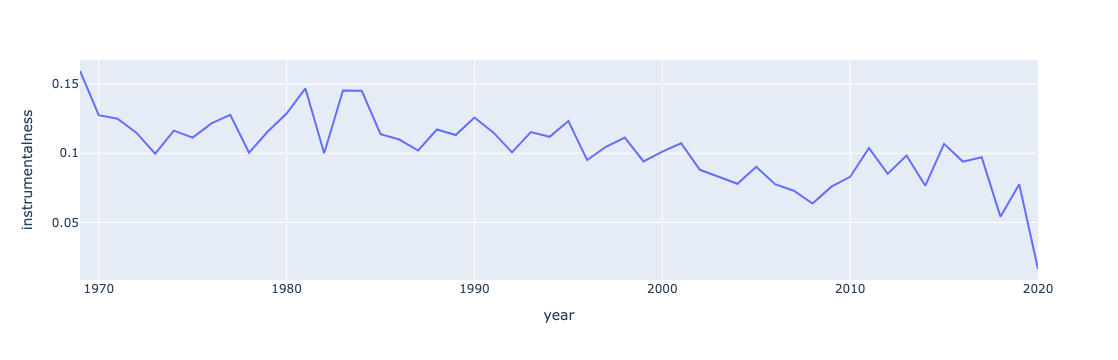

In [70]:
# isolating instrumentalness
instrument = df_year_post[['year', 'instrumentalness']]

# Ensure the index is a datetime index
instrument.index = pd.to_datetime(instrument['year'], format='%Y')
instrument_copy = instrument.drop(columns = ['year']).copy()

fig = px.line(instrument_copy, x=instrument_copy.index, y=instrument_copy['instrumentalness'])
fig.show()

In [71]:
# testing for stationarity
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(instrument_copy['instrumentalness'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:', adf_test[4])

ADF Statistic: -1.036877
p-value: 0.739578
Critical Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}


>The p-value higher than significance level of 0.5 indicates the data is not stationary. 

In [72]:
# Checking autocorrelation
autocorrelation_lag1 = instrument_copy['instrumentalness'].autocorr(lag=1)
print("One Year Lag: ", autocorrelation_lag1)

autocorrelation_lag2 = instrument_copy['instrumentalness'].autocorr(lag=2)
print("Two Year Lag: ", autocorrelation_lag2)

autocorrelation_lag3 = instrument_copy['instrumentalness'].autocorr(lag=3)
print("Three Year Lag: ", autocorrelation_lag3)

autocorrelation_lag10 = instrument_copy['instrumentalness'].autocorr(lag=10)
print("Ten Year Lag: ", autocorrelation_lag10)

autocorrelation_lag20 = instrument_copy['instrumentalness'].autocorr(lag=20)
print("Twenty Year Lag: ", autocorrelation_lag10)

One Year Lag:  0.6100942460244297
Two Year Lag:  0.6412100897965909
Three Year Lag:  0.4645797866098616
Ten Year Lag:  0.5238561840176388
Twenty Year Lag:  0.5238561840176388


>The highest correlation occurs with a 2-year lag.

In [73]:
# First-order differencing to make the time series stationary
instrument_copy['Differenced_Data'] = instrument_copy['instrumentalness'] - (instrument_copy['instrumentalness'].shift(1))
instrument_copy = instrument_copy.dropna()
instrument_copy.head()

instrumentalness  Differenced_Data
year                                          
1970-01-01          0.127567         -0.031886
1971-01-01          0.125018         -0.002549
1972-01-01          0.114880         -0.010138
1973-01-01          0.099680         -0.015200
1974-01-01          0.116361          0.016681

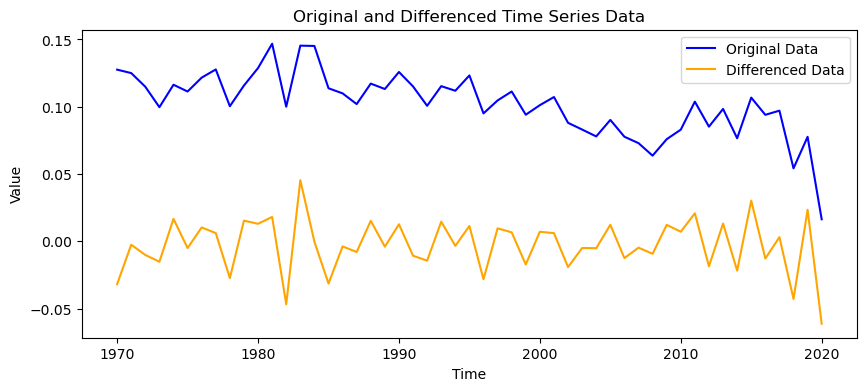

In [74]:
plt.figure(figsize=(10, 4))

# Plot the original data in blue
plt.plot(instrument_copy.index, instrument_copy['instrumentalness'], label='Original Data', color='blue')

# Plot the differenced time series data in orange
plt.plot(instrument_copy.index, instrument_copy['Differenced_Data'], label='Differenced Data', color='orange')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original and Differenced Time Series Data')
plt.legend()
plt.show()

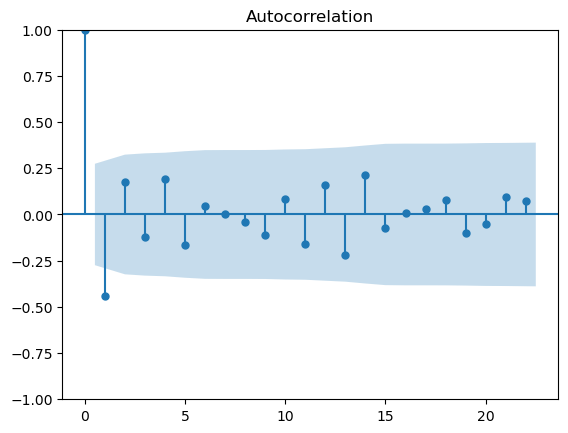

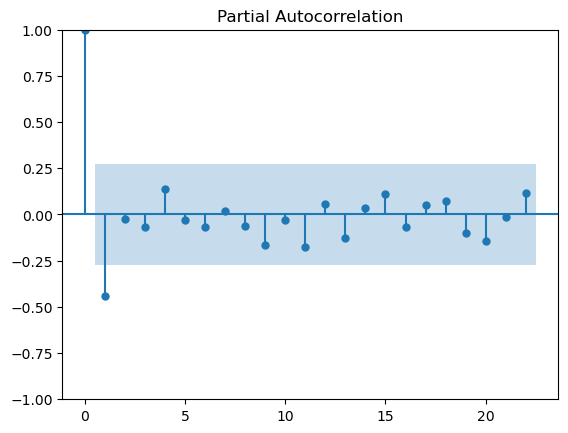

In [75]:
# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(instrument_copy['Differenced_Data'], lags=22)
plot_pacf(instrument_copy['Differenced_Data'], lags=22)
plt.show()

/Users/Alli/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/Users/Alli/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/Users/Alli/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/Users/Alli/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



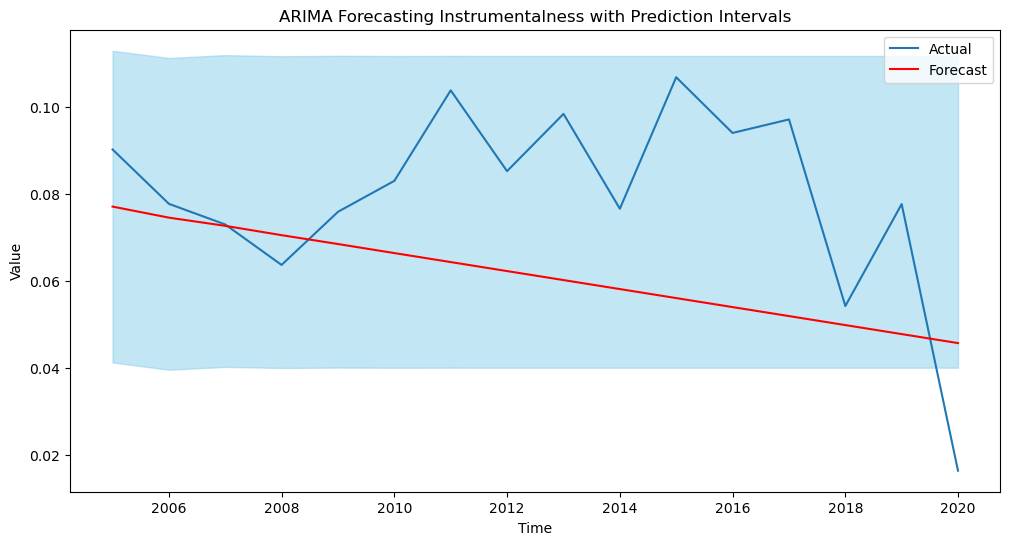

In [76]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and test sets
y = instrument_copy['Differenced_Data']
train_size = int(len(y) * 0.7)
train, test = y[:train_size], y[train_size:]

# Fit the ARIMA model
ARIMAmodel1 = ARIMA(train, order=(1, 1, 1)).fit()

# Forecast the test data
differenced_forecast1 = ARIMAmodel1.forecast(steps=len(test))

# Calculate prediction intervals
residuals = ARIMAmodel1.resid
sigma = np.std(residuals)
lower_bound_forecast = differenced_forecast1 - 1.96 * sigma
upper_bound_forecast = differenced_forecast1 + 1.96 * sigma

# Ensure the index length matches the test data length
index_test = instrument_copy.index[train_size:train_size + len(test)]

# Revert differenced forecasts to original scale
last_original_value = instrument_copy['instrumentalness'].iloc[train_size - 1]
original_forecast = last_original_value + differenced_forecast1.cumsum()

# Convert prediction intervals to original scale
lower_bound = last_original_value + lower_bound_forecast
upper_bound = last_original_value + upper_bound_forecast

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(index_test, instrument_copy['instrumentalness'][train_size:train_size + len(test)], label='Actual')  # Actual test values
plt.plot(index_test, original_forecast, label='Forecast', color='red')  # Forecasted original values
plt.fill_between(index_test, lower_bound, upper_bound, color='skyblue', alpha=0.5)  # Prediction intervals
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecasting Instrumentalness with Prediction Intervals')
plt.legend()
plt.show()

In [78]:
# evaluating root mean squared error
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,differenced_forecast1))
print("RMSE: ", rms)

RMSE:  0.023766155669858843


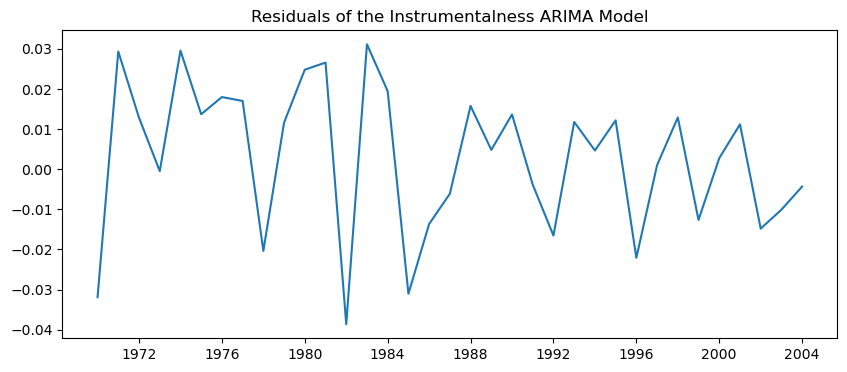

In [79]:
# Check residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals of the Instrumentalness ARIMA Model')
plt.show()

## Danceability

In [80]:
# just looking at danceability

df_year_post_dance = df_year_post[['year', 'danceability']]
df_year_post_dance.head()

year  danceability
48  1969      0.488098
49  1970      0.506308
50  1971      0.504274
51  1972      0.520999
52  1973      0.515449

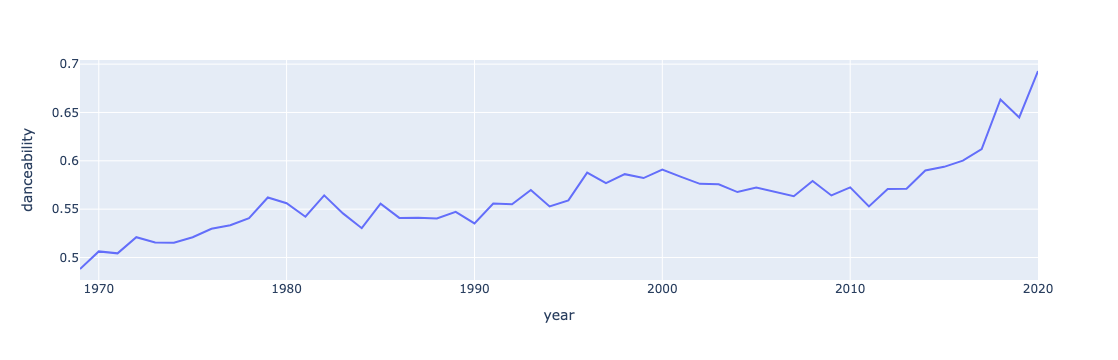

In [81]:
# Ensure the index is a datetime index
df_year_post_dance.index = pd.to_datetime(df_year_post_dance['year'], format='%Y')
dance_copy = df_year_post_dance.drop(columns = ['year']).copy()

fig = px.line(dance_copy, x=dance_copy.index, y=dance_copy['danceability'])
fig.show()

In [82]:
# testing for stationarity
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(dance_copy['danceability'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:', adf_test[4])

ADF Statistic: 1.191402
p-value: 0.995926
Critical Values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}


In [83]:
# Checking autocorrelation
autocorrelation_lag1 = dance_copy['danceability'].autocorr(lag=1)
print("One Year Lag: ", autocorrelation_lag1)

autocorrelation_lag5 = dance_copy['danceability'].autocorr(lag=5)
print("Five Year Lag: ", autocorrelation_lag5)

autocorrelation_lag10 = dance_copy['danceability'].autocorr(lag=10)
print("Ten Year Lag: ", autocorrelation_lag10)

autocorrelation_lag20 = dance_copy['danceability'].autocorr(lag=20)
print("Twenty Year Lag: ", autocorrelation_lag10)

One Year Lag:  0.900860604224388
Five Year Lag:  0.6263652597537213
Ten Year Lag:  0.4033859116767172
Twenty Year Lag:  0.4033859116767172


In [84]:
# Differencing to make the time series stationary
dance_copy['Differenced_Data'] = dance_copy['danceability'] - dance_copy['danceability'].shift(1)
dance_copy = dance_copy.dropna()
dance_copy.head()

danceability  Differenced_Data
year                                      
1970-01-01      0.506308          0.018210
1971-01-01      0.504274         -0.002034
1972-01-01      0.520999          0.016726
1973-01-01      0.515449         -0.005550
1974-01-01      0.515340         -0.000110

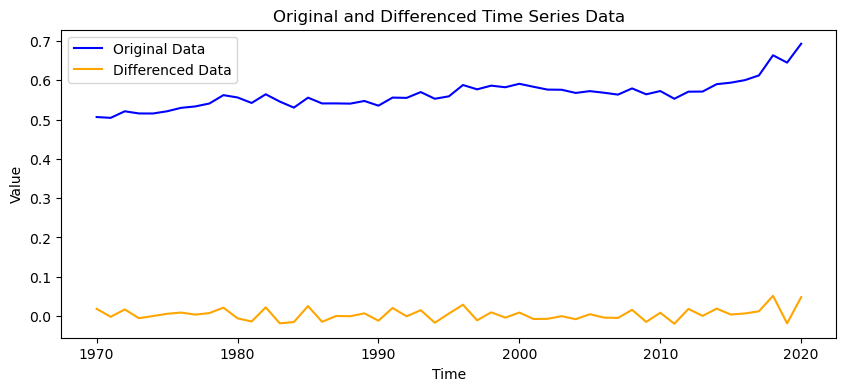

In [85]:
plt.figure(figsize=(10, 4))

# Plot the original data in blue
plt.plot(dance_copy.index, dance_copy['danceability'], label='Original Data', color='blue')

# Plot the differenced time series data in orange
plt.plot(dance_copy.index, dance_copy['Differenced_Data'], label='Differenced Data', color='orange')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original and Differenced Time Series Data')
plt.legend()
plt.show()

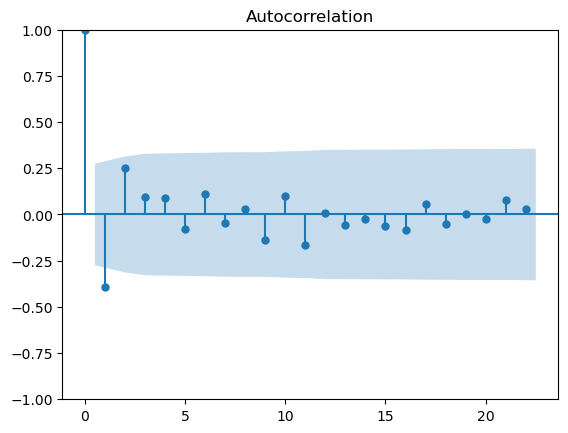

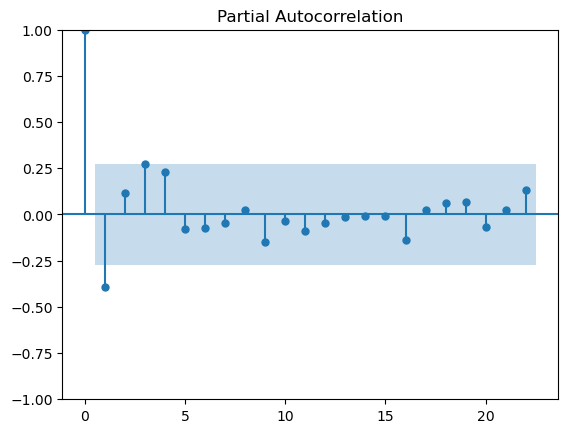

In [86]:
# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dance_copy['Differenced_Data'], lags=22)
plot_pacf(dance_copy['Differenced_Data'], lags=22)
plt.show()

/Users/Alli/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/Users/Alli/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/Users/Alli/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/Users/Alli/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



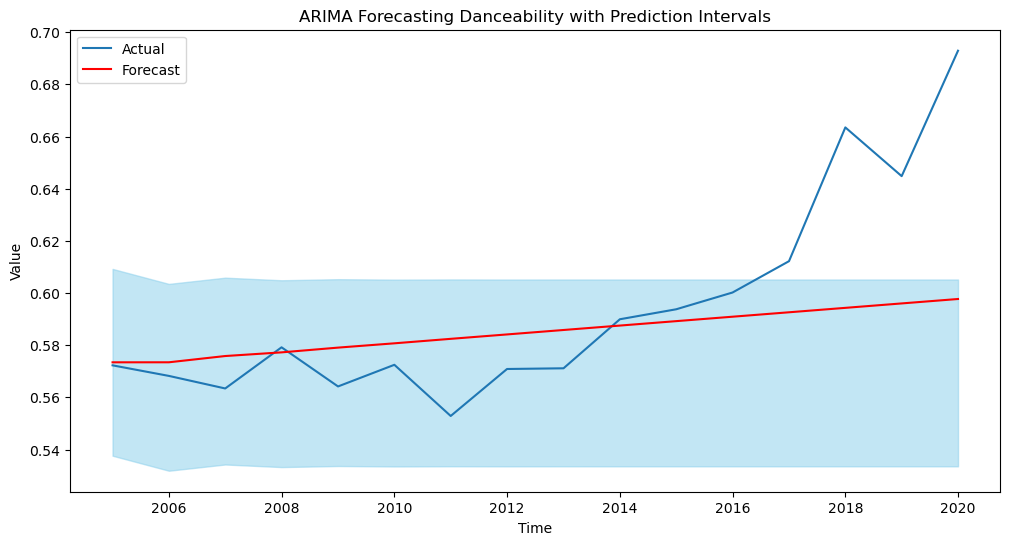

In [87]:
# Split the data into training and test sets
y2 = dance_copy['Differenced_Data']
train_size = int(len(y) * 0.7)
train, test = y2[:train_size], y2[train_size:]

# Fit the ARIMA model
ARIMAmodel2 = ARIMA(train, order=(1, 1, 1)).fit()

# Forecast the test data
differenced_forecast2 = ARIMAmodel2.forecast(steps=len(test))

# Calculate prediction intervals
residuals2 = ARIMAmodel2.resid
sigma = np.std(residuals)
lower_bound_forecast = differenced_forecast2 - 1.96 * sigma
upper_bound_forecast = differenced_forecast2 + 1.96 * sigma

# Ensure the index length matches the test data length
index_test = dance_copy.index[train_size:train_size + len(test)]

# Revert differenced forecasts to original scale
last_original_value = dance_copy['danceability'].iloc[train_size - 1]
original_forecast = last_original_value + differenced_forecast2.cumsum()

# Convert prediction intervals to original scale
lower_bound = last_original_value + lower_bound_forecast
upper_bound = last_original_value + upper_bound_forecast

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(index_test, dance_copy['danceability'][train_size:train_size + len(test)], label='Actual')  # Actual test values
plt.plot(index_test, original_forecast, label='Forecast', color='red')  # Forecasted original values
plt.fill_between(index_test, lower_bound, upper_bound, color='skyblue', alpha=0.5)  # Prediction intervals
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecasting Danceability with Prediction Intervals')
plt.legend()
plt.show()

In [88]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,differenced_forecast2))
print("RMSE: ", rms)

RMSE:  0.02058516212966751


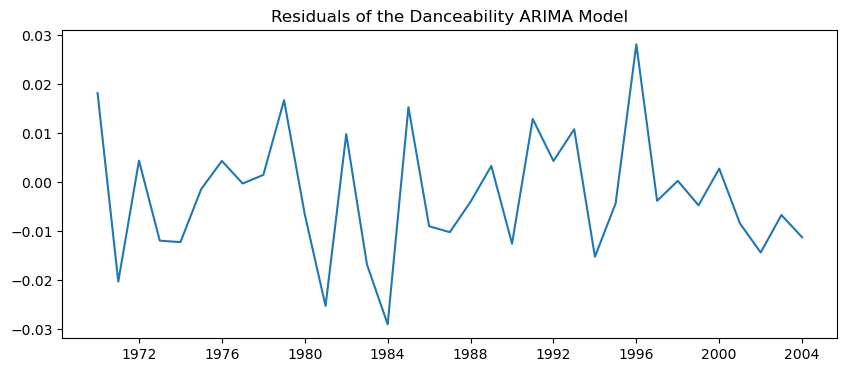

In [89]:
# Check residuals
plt.figure(figsize=(10, 4))
plt.plot(residuals2)
plt.title('Residuals of the Danceability ARIMA Model')
plt.show()

# Conclusion and Business Recommendations

Recommendations:
- Most popular songs are in major keys
- G, C, D, and A are the most common keys
- Avoid explicit lyrics
- Songs with high danceability will likely persist in popularity
- People gravitate towards songs with lyrics

# Sources
- Dataset: https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset